# EV Sales

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df= pd.read_csv("data/Electric Vehicle Sales by State in India.csv")
df.head(2)

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0


In [4]:
df.shape

(96845, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  float64
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.9+ MB


In [6]:
df.describe()

,Year,EV_Sales_Quantity
count,96845.000000,96845.000000
mean,2018.622768,37.108896
std,2.895581,431.566675
min,2014.000000,0.000000
25%,2016.000000,0.000000
50%,2019.000000,0.000000
75%,2021.000000,0.000000
max,2024.000000,20584.000000


In [8]:
for col in df.columns:
    n = df[col].isnull().sum() / len(df[col])
    print(f"{col} null : {n}")

Year null : 0.0
Month_Name null : 0.0
Date null : 0.0
State null : 0.0
Vehicle_Class null : 0.0
Vehicle_Category null : 0.0
Vehicle_Type null : 0.0
EV_Sales_Quantity null : 0.0


In [9]:
for col in df.columns:
    n = len(df[col].unique())
    print(f"{col} unique : {n}")

Year unique : 11
Month_Name unique : 12
Date unique : 121
State unique : 34
Vehicle_Class unique : 73
Vehicle_Category unique : 5
Vehicle_Type unique : 12
EV_Sales_Quantity unique : 1447


In [10]:
df['Date'].unique()

array(['1/1/2014', '1/1/2015', '1/1/2016', '1/1/2017', '1/1/2018',
       '1/1/2019', '1/1/2020', '1/1/2021', '1/1/2022', '1/1/2023',
       '1/1/2024', '2/1/2014', '2/1/2015', '2/1/2016', '2/1/2017',
       '2/1/2018', '2/1/2019', '2/1/2020', '2/1/2021', '2/1/2022',
       '2/1/2023', '3/1/2014', '3/1/2015', '3/1/2016', '3/1/2017',
       '3/1/2018', '3/1/2019', '3/1/2020', '3/1/2021', '3/1/2022',
       '3/1/2023', '4/1/2014', '4/1/2015', '4/1/2016', '4/1/2017',
       '4/1/2018', '4/1/2019', '4/1/2020', '4/1/2021', '4/1/2022',
       '4/1/2023', '5/1/2014', '5/1/2015', '5/1/2016', '5/1/2017',
       '5/1/2018', '5/1/2019', '5/1/2020', '5/1/2021', '5/1/2022',
       '5/1/2023', '6/1/2014', '6/1/2015', '6/1/2016', '6/1/2017',
       '6/1/2018', '6/1/2019', '6/1/2020', '6/1/2021', '6/1/2022',
       '6/1/2023', '7/1/2014', '7/1/2015', '7/1/2016', '7/1/2017',
       '7/1/2018', '7/1/2019', '7/1/2020', '7/1/2021', '7/1/2022',
       '7/1/2023', '8/1/2014', '8/1/2015', '8/1/2016', '8/1/20

#### EDA

In [11]:
df.head(2)

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0


In [12]:
df['Date'] = pd.to_datetime(df['Date'],format = '%m/%d/%Y')

In [13]:
df.head(2)

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,2014-01-01,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,2014-01-01,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0


In [14]:
df.drop(['Year','Month_Name'], axis=1, inplace=True)

In [15]:
df.head(2)

,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014-01-01,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014-01-01,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0


In [16]:
df['DayofWeek'] = df['Date'].dt.day_name()

In [17]:
df.head(2)

,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity,DayofWeek
0,2014-01-01,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0,Wednesday
1,2014-01-01,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0,Wednesday


In [18]:
yearly_sales = df.groupby(df['Date'].dt.year)['EV_Sales_Quantity'].sum().reset_index()

In [19]:
yearly_sales 

,Date,EV_Sales_Quantity
0,2014,2392.0
1,2015,7805.0
2,2016,49855.0
3,2017,87420.0
4,2018,130254.0
5,2019,166819.0
6,2020,124684.0
7,2021,331498.0
8,2022,1024723.0
9,2023,1525179.0


<Axes: xlabel='Date', ylabel='EV_Sales_Quantity'>

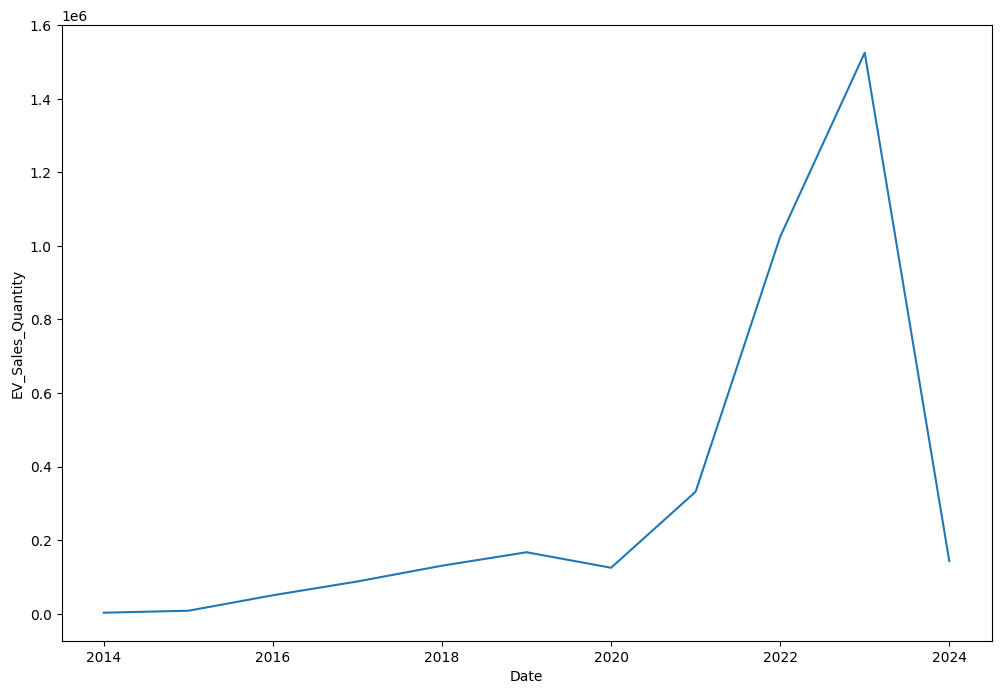

In [20]:
plt.figure(figsize =(12,8))
sns.lineplot(data=yearly_sales, y='EV_Sales_Quantity', x='Date')

<Axes: xlabel='Date', ylabel='EV_Sales_Quantity'>

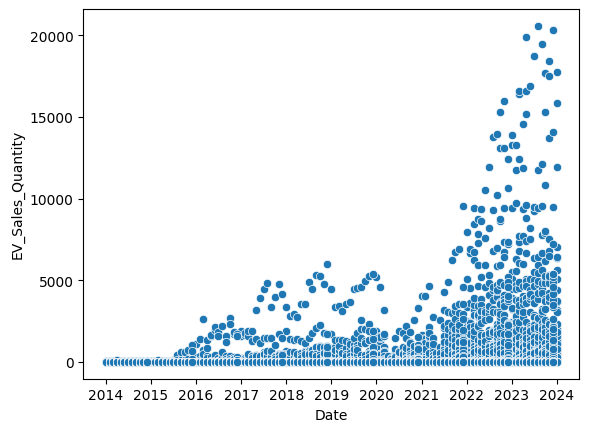

In [21]:
sns.scatterplot(data=df, x='Date', y='EV_Sales_Quantity')

<Axes: xlabel='Date', ylabel='EV_Sales_Quantity'>

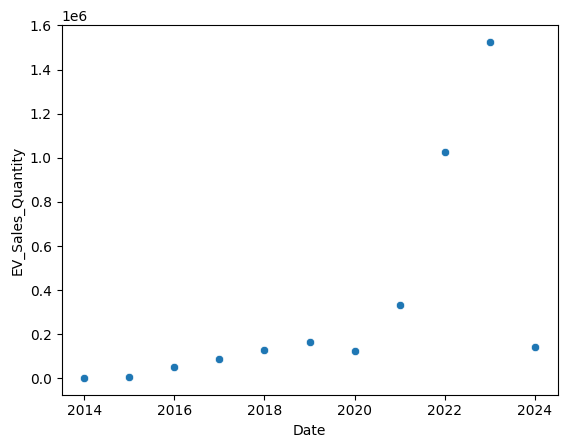

In [22]:
sns.scatterplot(data=yearly_sales, x='Date', y='EV_Sales_Quantity')

<Axes: xlabel='Date', ylabel='EV_Sales_Quantity'>

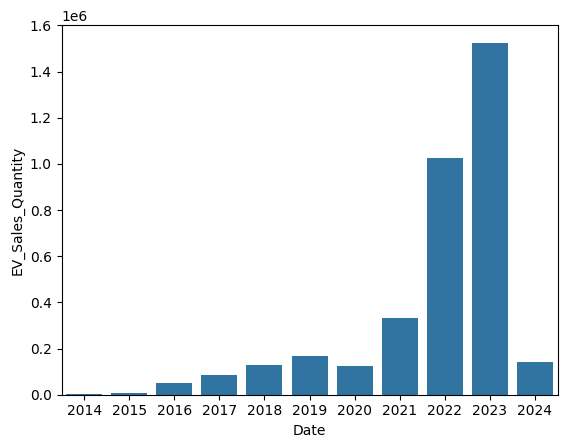

In [23]:
sns.barplot(data=yearly_sales,x='Date', y='EV_Sales_Quantity')

In [24]:
df.head(2)

,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity,DayofWeek
0,2014-01-01,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0,Wednesday
1,2014-01-01,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0,Wednesday


In [25]:
veh_type_sale = df.groupby(df['Vehicle_Type'])['EV_Sales_Quantity'].sum().reset_index()
veh_type_sale

,Vehicle_Type,EV_Sales_Quantity
0,2W_Personal,1796340.0
1,2W_Shared,11765.0
2,3W_Goods,44974.0
3,3W_Goods_LowSpeed,90656.0
4,3W_Personal,421.0
5,3W_Shared,76132.0
6,3W_Shared_LowSpeed,1408127.0
7,4W_Personal,130676.0
8,4W_Shared,19099.0
9,Bus,7009.0


<Axes: xlabel='EV_Sales_Quantity', ylabel='Vehicle_Type'>

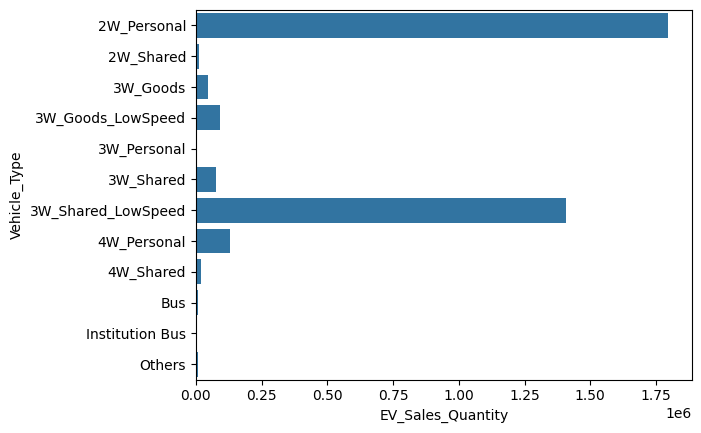

In [26]:
sns.barplot(data=veh_type_sale, x='EV_Sales_Quantity',y='Vehicle_Type')

In [27]:
yearly_veh_type_sale = df.groupby([df['Date'].dt.year,'Vehicle_Type'])['EV_Sales_Quantity'].sum().reset_index()

In [28]:
yearly_veh_type_sale

,Date,Vehicle_Type,EV_Sales_Quantity
0,2014,2W_Personal,1679.0
1,2014,2W_Shared,0.0
2,2014,3W_Goods,3.0
3,2014,3W_Goods_LowSpeed,0.0
4,2014,3W_Personal,2.0
...,...,...,...
127,2024,4W_Personal,6581.0
128,2024,4W_Shared,1387.0
129,2024,Bus,506.0
130,2024,Institution Bus,0.0


<Axes: xlabel='Date', ylabel='EV_Sales_Quantity'>

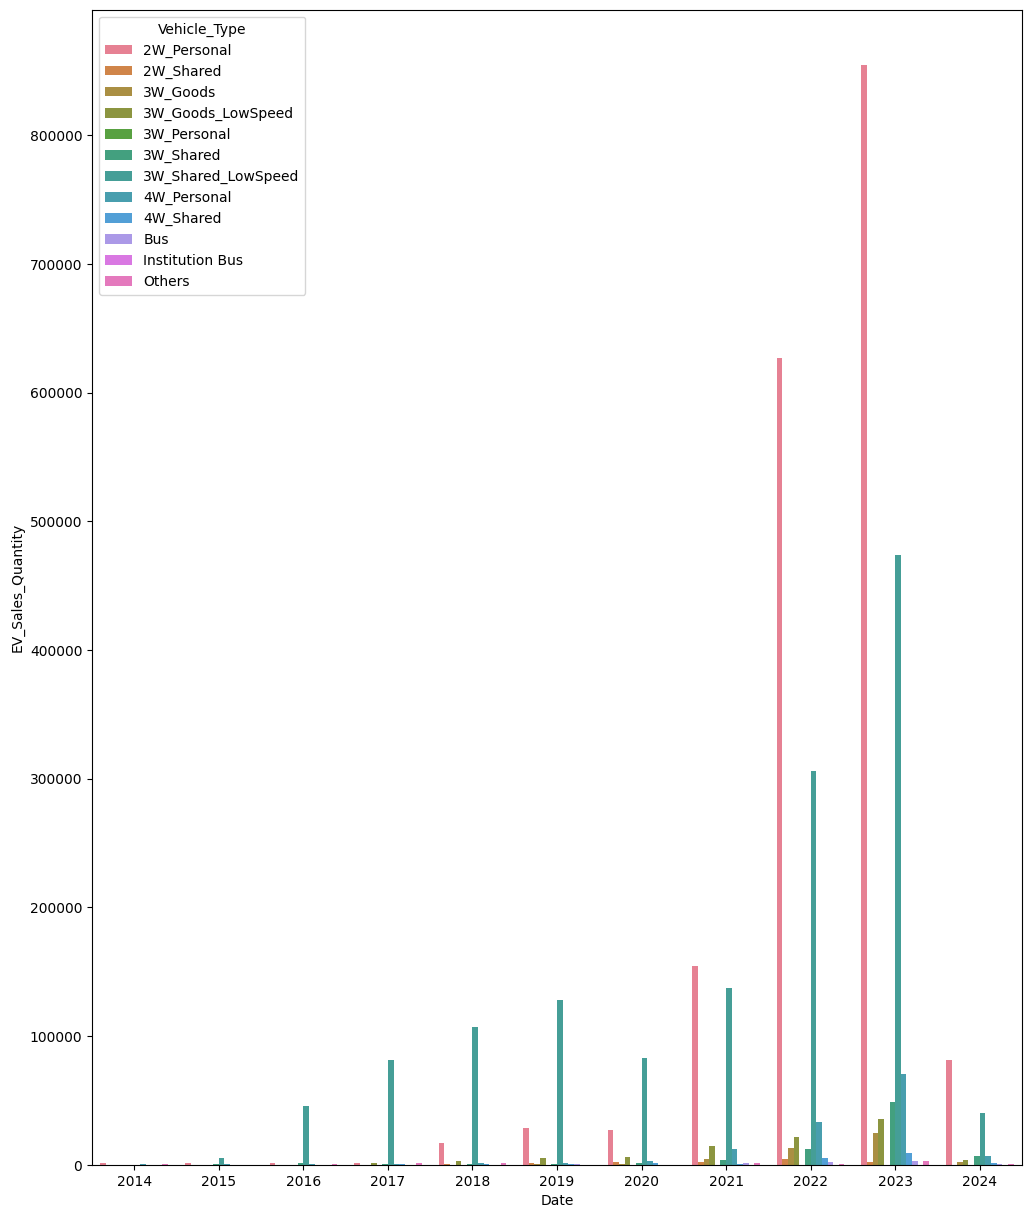

In [29]:
plt.figure(figsize=(12,15))
sns.barplot(data=yearly_veh_type_sale,hue='Vehicle_Type',y='EV_Sales_Quantity',x='Date')

In [30]:
(df['Date'].dt.day).unique()

array([1], dtype=int32)

In [31]:
df['Date'].dt.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [32]:
df['Year'] = df['Date'].dt.year

In [33]:
df['Month'] = df['Date'].dt.month

In [34]:
df['Day'] = df['Date'].dt.day

In [35]:
df.head(2)

,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity,DayofWeek,Year,Month,Day
0,2014-01-01,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0,Wednesday,2014,1,1
1,2014-01-01,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0,Wednesday,2014,1,1


In [36]:
df.drop(columns=['Date'], axis=1, inplace=True)

In [37]:
df.head(2)

,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity,DayofWeek,Year,Month,Day
0,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0,Wednesday,2014,1,1
1,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0,Wednesday,2014,1,1


In [38]:
df_encoded = pd.get_dummies(df, drop_first=True, dtype='int')
df_encoded.columns

Index(['EV_Sales_Quantity', 'Year', 'Month', 'Day', 'State_Andhra Pradesh',
       'State_Arunachal Pradesh', 'State_Assam', 'State_Bihar',
       'State_Chandigarh', 'State_Chhattisgarh',
       ...
       'Vehicle_Type_4W_Shared', 'Vehicle_Type_Bus',
       'Vehicle_Type_Institution Bus', 'Vehicle_Type_Others',
       'DayofWeek_Monday', 'DayofWeek_Saturday', 'DayofWeek_Sunday',
       'DayofWeek_Thursday', 'DayofWeek_Tuesday', 'DayofWeek_Wednesday'],
      dtype='object', length=130)

In [39]:
# model built

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

In [40]:
X=df_encoded.drop(columns=['EV_Sales_Quantity'], axis=1)
y=df_encoded['EV_Sales_Quantity']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [42]:
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [43]:
# lin_reg = LinearRegression()

# lin_reg.fit(X_train_sc, y_train)

In [44]:
# y_pred = lin_reg.predict(X_test_sc)
# y_pred

In [45]:
# print(f"Coefficient of input features : {lin_reg.coef_}")
# print(f"Intercept of the input feature : {lin_reg.intercept_}")

In [46]:
# feature_names = X_train.columns
# coefficient = lin_reg.coef_

In [47]:
# for feature, coef in zip(feature_names, coefficient):
#     print(f"{feature} : {coef:.2f}")

In [48]:
# # Compare Actual with Predicted in DataFrame

# predictions = pd.DataFrame(y_test.values,columns=['Actual'])
# predictions['Predicted']=y_pred
# predictions

In [49]:
# X_test.shape , y_test.shape

In [50]:

# print(f"MSE on test data : {mean_squared_error(y_test, y_pred)}")

# print(f"MSE on train data : {mean_squared_error(y_train, lin_reg.predict(X_train_sc))}")

In [51]:
# print(f"R2 Score for test data : {r2_score(y_test, y_pred)}")
# print(f"R2 Score for train data : {r2_score(y_train, lin_reg.predict(X_train_sc))}")

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVC
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
def regression_model(x_train,y_train,x_test, y_test):
    models={
        'linear regression':LinearRegression(),
        'decision tree':DecisionTreeRegressor(),
        'random forest':RandomForestRegressor(),
        'ridge':Ridge(),
        'lasso': Lasso()
    }

    results1={}
    results2={}

    for name, model in models.items():
        model.fit(x_train,y_train)         #fitting model train data
        y_pred = model.predict(x_test)


        train_pred = model.predict(x_train)     # predicting on train data

        rmse_train = np.sqrt(mean_squared_error(y_train, train_pred))
        r2_train = r2_score(y_train, train_pred)
        
        rmse_test = np.sqrt(mean_squared_error(y_pred, y_test))
        r2_test = r2_score(y_pred,y_test)

        results1[name]={'RMSE': rmse_test, 'R2 Score': r2_test}
        results2[name]={'RMSE' : rmse_train, 'R2_Score':r2_train}
        

        print(f"Model Evalutaion of Test Data")
        print(f"Model Name : {name}")
        print(f"RMSE : {rmse_test}")
        print(f"R2 Score : {r2_score(y_pred,y_test)}")
        print("--"*25)
        print(f"Model Evaluation on Training Data")
        print(f"Model Name: {name}")
        print(f"RMSE Score : {rmse_train}")
        print(f"R2 Score : {r2_train}")
        print("=="*50)

In [54]:
regression_model(X_train_sc,y_train, X_test_sc, y_test)

Model Evalutaion of Test Data
Model Name : linear regression
RMSE : 484.09772028363113
R2 Score : -12.570215280731057
--------------------------------------------------
Model Evaluation on Training Data
Model Name: linear regression
RMSE Score : 386.8664270307751
R2 Score : 0.10753025680376405
Model Evalutaion of Test Data
Model Name : decision tree
RMSE : 144.46673729522715
R2 Score : 0.9052460640983024
--------------------------------------------------
Model Evaluation on Training Data
Model Name: decision tree
RMSE Score : 0.0
R2 Score : 1.0
Model Evalutaion of Test Data
Model Name : random forest
RMSE : 128.14998300349788
R2 Score : 0.9176124605043655
--------------------------------------------------
Model Evaluation on Training Data
Model Name: random forest
RMSE Score : 37.69002747557718
R2 Score : 0.9915292020168588
Model Evalutaion of Test Data
Model Name : ridge
RMSE : 484.09785676615695
R2 Score : -12.570516982588243
--------------------------------------------------
Model E

In [55]:
df['EV_Sales_Quantity'].min(),df['EV_Sales_Quantity'].max()

(np.float64(0.0), np.float64(20584.0))

In [56]:
rf = RandomForestRegressor()

rf.fit(X_train_sc, y_train)

RandomForestRegressor()

In [57]:
y_pred = rf.predict(X_test_sc)

print(f" RMSE : {np.sqrt(mean_squared_error(y_pred, y_test))}")
print(f"R2 Score : {r2_score(y_pred, y_test)}")

 RMSE : 127.43610612165955
R2 Score : 0.9181093423694898


In [58]:
predictions = pd.DataFrame(y_test.values, columns=["Actual"])
predictions['Predicted']=y_pred
predictions.head(15)

,Actual,Predicted
0,0.0,0.00
1,0.0,0.00
2,0.0,0.02
3,0.0,0.00
4,0.0,0.00
5,0.0,0.00
6,0.0,0.11
7,0.0,0.00
8,0.0,0.00
9,77.0,95.30


In [59]:
df_encoded.columns

Index(['EV_Sales_Quantity', 'Year', 'Month', 'Day', 'State_Andhra Pradesh',
       'State_Arunachal Pradesh', 'State_Assam', 'State_Bihar',
       'State_Chandigarh', 'State_Chhattisgarh',
       ...
       'Vehicle_Type_4W_Shared', 'Vehicle_Type_Bus',
       'Vehicle_Type_Institution Bus', 'Vehicle_Type_Others',
       'DayofWeek_Monday', 'DayofWeek_Saturday', 'DayofWeek_Sunday',
       'DayofWeek_Thursday', 'DayofWeek_Tuesday', 'DayofWeek_Wednesday'],
      dtype='object', length=130)

In [60]:
df[["Year","Month"]].min()

Year     2014
Month       1
dtype: int32

In [61]:
df[["Year","Month"]].max()

Year     2024
Month      12
dtype: int32

In [75]:
rf = RandomForestRegressor()

rf.fit(X_train_sc, y_train)

RandomForestRegressor()

In [76]:
y_pred = rf.predict(X_test_sc)

In [77]:
mse = mean_squared_error(y_test, y_pred)
print(f"Test RMSE:", {np.sqrt(mse)})
print(f"R2 Score : {r2_score(y_pred, y_test)}")

Test RMSE: {np.float64(128.51401013211554)}
R2 Score : 0.9167171140874552


In [78]:
print(f"{rf.feature_importances_}")

[2.96933265e-01 3.67044735e-02 0.00000000e+00 5.27746310e-03
 1.43406874e-08 9.76755809e-03 1.60534991e-02 4.23490597e-05
 2.45110688e-03 7.12644014e-08 1.51688837e-02 3.62466302e-04
 2.41629209e-02 1.94230950e-03 6.26064773e-06 1.27447031e-04
 8.92821322e-04 6.51856300e-02 1.88631094e-02 3.05365524e-08
 8.46700403e-03 1.53274116e-01 5.74349789e-07 3.93871374e-08
 7.64095098e-08 2.02725958e-08 6.71873742e-03 3.58491807e-05
 1.13661066e-03 1.83284701e-02 9.75167295e-09 3.03112577e-02
 1.13920033e-04 1.70312593e-01 8.71817062e-04 1.59860070e-03
 3.86379334e-09 4.97882784e-09 2.10977688e-10 2.60867695e-11
 4.84064568e-09 1.90837307e-11 3.48864201e-09 6.60844838e-12
 7.37202134e-06 1.51681061e-10 8.73993931e-10 7.91293147e-10
 1.20085679e-07 5.79024038e-11 2.37900844e-09 1.64979815e-09
 2.45204469e-04 2.54921867e-02 4.70394244e-09 1.45187468e-08
 2.19969587e-10 3.90855561e-09 3.63063343e-10 3.38075923e-09
 7.45902021e-09 5.62910583e-06 2.34449649e-09 3.09033813e-09
 1.83079109e-11 1.627696

In [83]:
feature_importance = rf.feature_importances_
feature_name = df_encoded.drop(columns=['EV_Sales_Quantity']).columns

importance_df = pd.DataFrame({'Feature':feature_name, 'Importance':feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

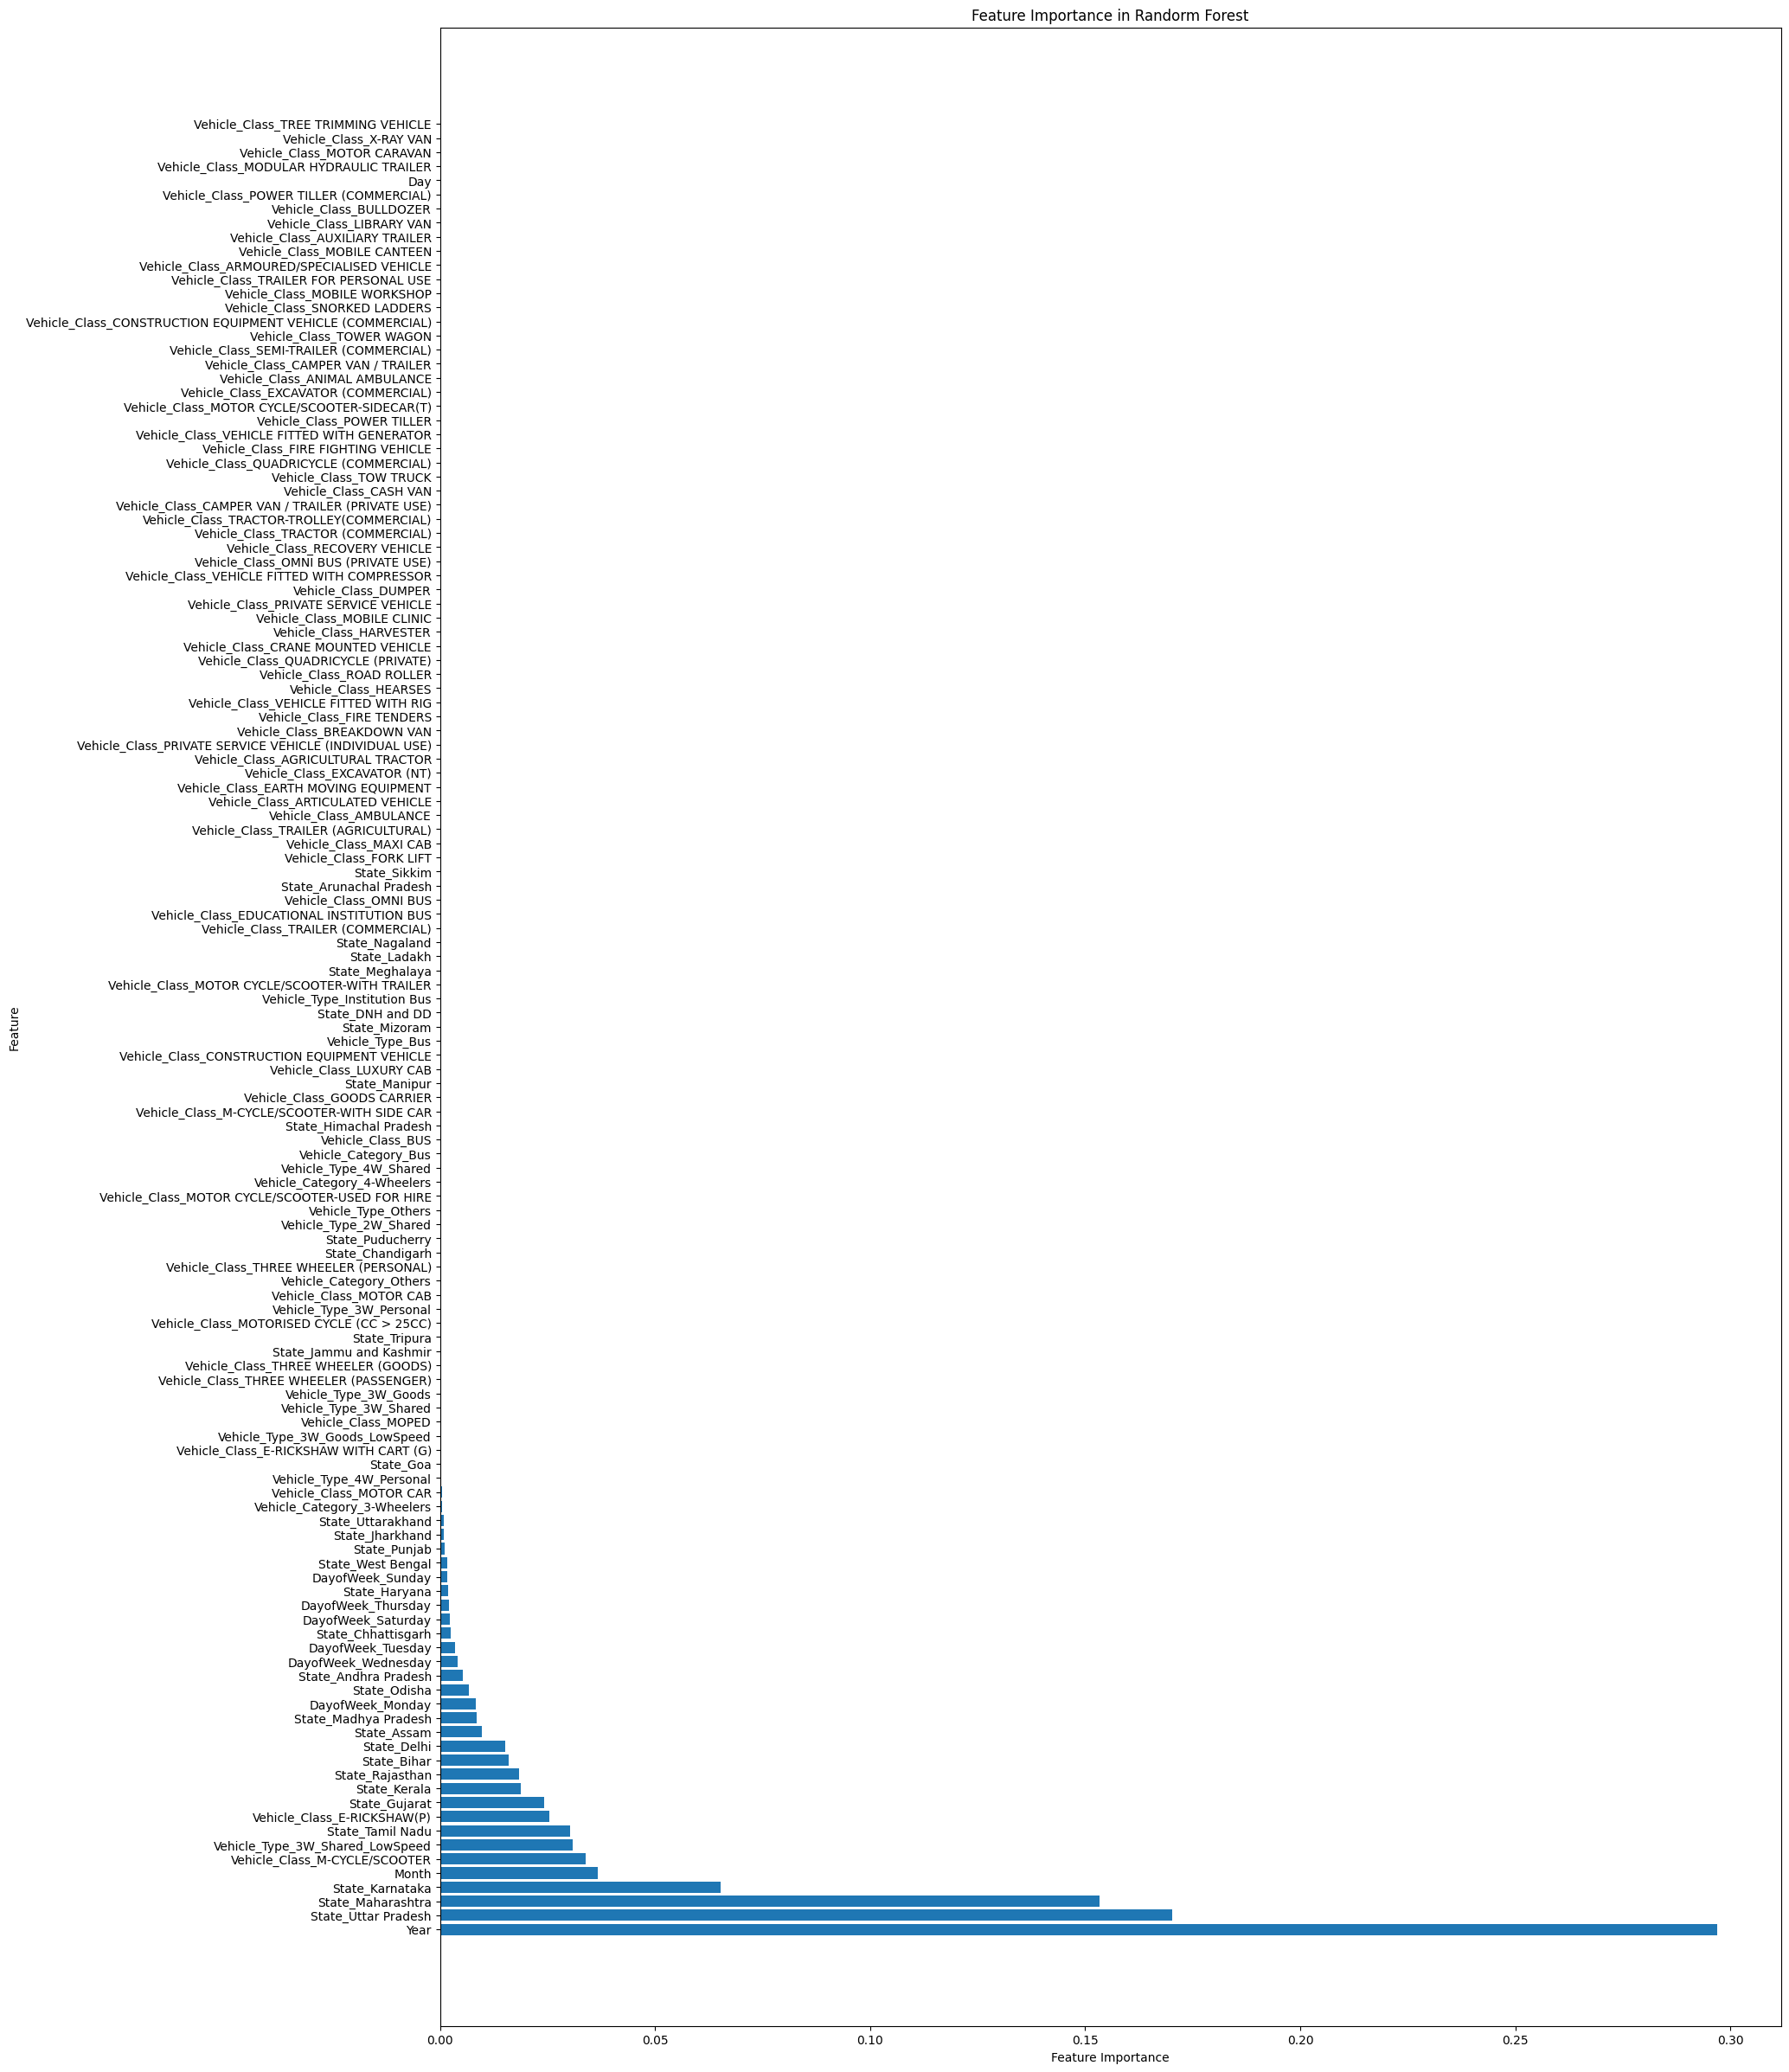

In [86]:
plt.figure(figsize=(20,30))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title("Feature Importance in Randorm Forest")
plt.show()

In [92]:
comparision_df = pd.DataFrame({'Actual':y_test.values, 'Predicted':y_pred})
comparision_df.head(10)

,Actual,Predicted
0,0.0,0.00
1,0.0,0.00
2,0.0,0.03
3,0.0,0.00
4,0.0,0.00
5,0.0,0.00
6,0.0,0.11
7,0.0,0.00
8,0.0,0.00
9,77.0,90.65


In [93]:
comparision_df.tail(10)

,Actual,Predicted
19359,0.0,0.00
19360,0.0,0.00
19361,0.0,0.04
19362,0.0,0.00
19363,0.0,0.00
19364,0.0,0.00
19365,0.0,0.00
19366,0.0,0.00
19367,312.0,141.32
19368,0.0,0.00


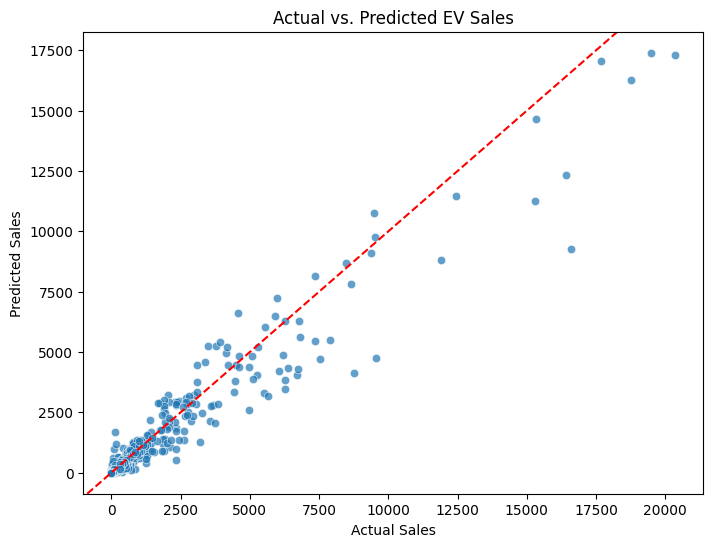

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted EV Sales")
plt.axline((0, 0), slope=1, color="red", linestyle="--")  # Ideal line (y = x)
plt.show()

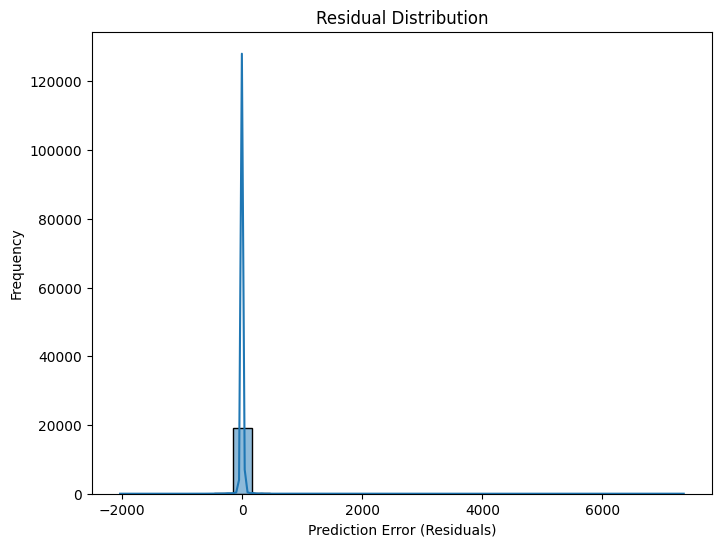

In [95]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Prediction Error (Residuals)")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()


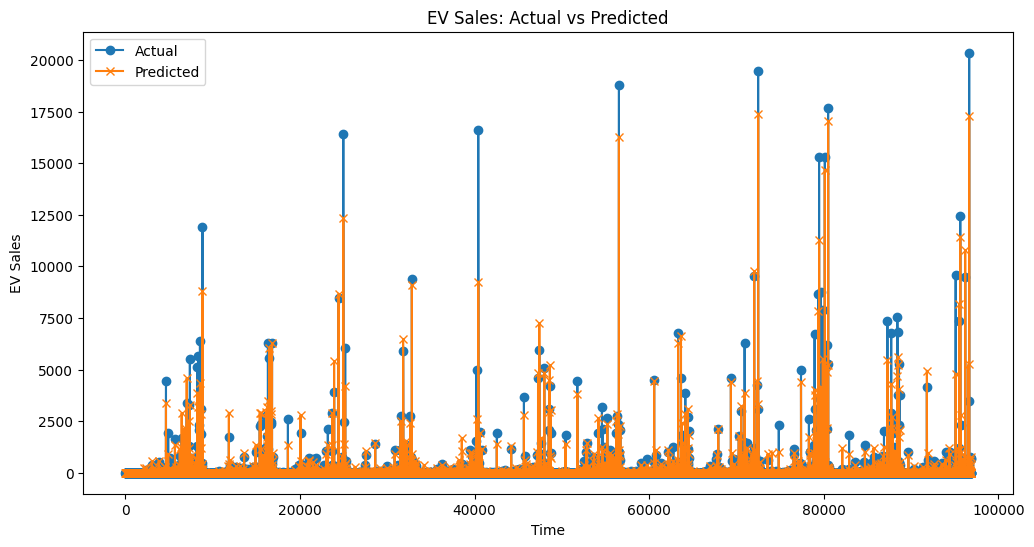

In [96]:
df_test = X_test.copy()
df_test['Actual'] = y_test
df_test['Predicted'] = y_pred
df_test = df_test.sort_index()  # Ensure the time order is correct

plt.figure(figsize=(12, 6))
plt.plot(df_test.index, df_test['Actual'], label="Actual", marker='o')
plt.plot(df_test.index, df_test['Predicted'], label="Predicted", marker='x')
plt.xlabel("Time")
plt.ylabel("EV Sales")
plt.title("EV Sales: Actual vs Predicted")
plt.legend()
plt.show()
